In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('matic.csv')

In [183]:
print('Lets look at example of data from our CSV file')
print(df.head(3))

Lets look at example of data from our CSV file
                                              Txhash   Blockno  UnixTimestamp  \
0  0xaafaac21b251a16b4d8dcb8072c4b6c29a5dec08c896...  36585159     1670518290   
1  0xe66acff4c467e21c81acb3f574b57af3427650552b2e...  36585820     1670519652   
2  0xd2e268f75ac64f36429bcb27ef743b409e2c0269a1f4...  36585853     1670519718   

        DateTime (UTC)                                        From  \
0  2022-12-08 16:51:30  0x9e6ed2bdde9909964626e5a4a8839d50205a65e3   
1  2022-12-08 17:14:12  0x1213c2364061f7cf11eca008c121072c63a213db   
2  2022-12-08 17:15:18  0x1213c2364061f7cf11eca008c121072c63a213db   

                                           To  ContractAddress  \
0  0x1213c2364061f7cf11eca008c121072c63a213db              NaN   
1  0xba12222222228d8ba445958a75a0704d566bf2c8              NaN   
2  0x8159462d255c1d24915cb51ec361f700174cd994              NaN   

   Value_IN(MATIC)  Value_OUT(MATIC)  CurrentValue @ $0.785/MATIC  \
0       177.2

In [184]:
print('Lets check columns with monetary indicators if there is anomaly or incorrect values')
columns1 = ['Value_OUT(MATIC)', 'Value_IN(MATIC)', 'Historical $Price/MATIC', 'TxnFee(USD)', 'TxnFee(MATIC)', 'CurrentValue @ $0.785/MATIC']
df[columns1].describe()

Lets check columns with monetary indicators if there is anomaly or incorrect values


,Value_OUT(MATIC),Value_IN(MATIC),Historical $Price/MATIC,TxnFee(USD),TxnFee(MATIC),CurrentValue @ $0.785/MATIC
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,47.132299,22.917489,0.790000,0.021642,0.027566,54.994774
std,236.419002,146.099780,0.152107,0.035796,0.045595,215.094895
min,0.000000,0.000000,0.520000,0.000832,0.001059,0.000000
25%,0.000000,0.000000,0.730000,0.003077,0.003919,0.000000
50%,0.000000,0.000000,0.805000,0.010296,0.013114,0.000000
75%,10.000000,0.000000,0.880000,0.023514,0.029951,24.488646
max,2180.000000,1712.936696,1.110000,0.296355,0.377484,1711.477062


In [185]:
df['DateTime (UTC)_converted'] = pd.to_datetime(df['UnixTimestamp'], unit='s')
df['MonthYear'] = df['DateTime (UTC)_converted'].dt.to_period('M')
#convert date to more handy for

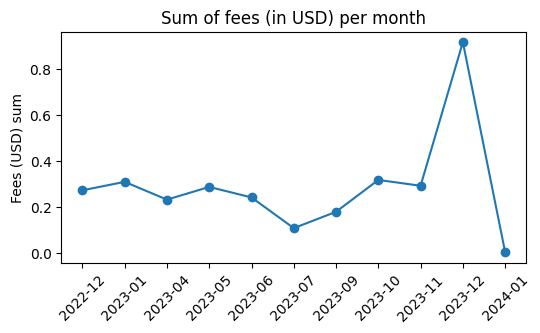

Total fees payed by user (in USD) - 3.159674099453706
Total fees payed by user (in MATIC) - 4.024646132575817


In [202]:
u = sum(df['TxnFee(USD)'])
m = sum(df['TxnFee(MATIC)'])
fee_sum = df.groupby('MonthYear')['TxnFee(USD)'].sum().reset_index()
fee_sum['MonthYear'] = fee_sum['MonthYear'].astype(str)
plt.figure(figsize=(6, 3))
plt.plot(fee_sum['MonthYear'], fee_sum['TxnFee(USD)'], marker='o')
plt.ylabel('Fees (USD) sum')
plt.title('Sum of fees (in USD) per month')
plt.xticks(rotation=45)
plt.show()
print('Total fees payed by user (in USD) -', u)
print('Total fees payed by user (in MATIC) -', m)

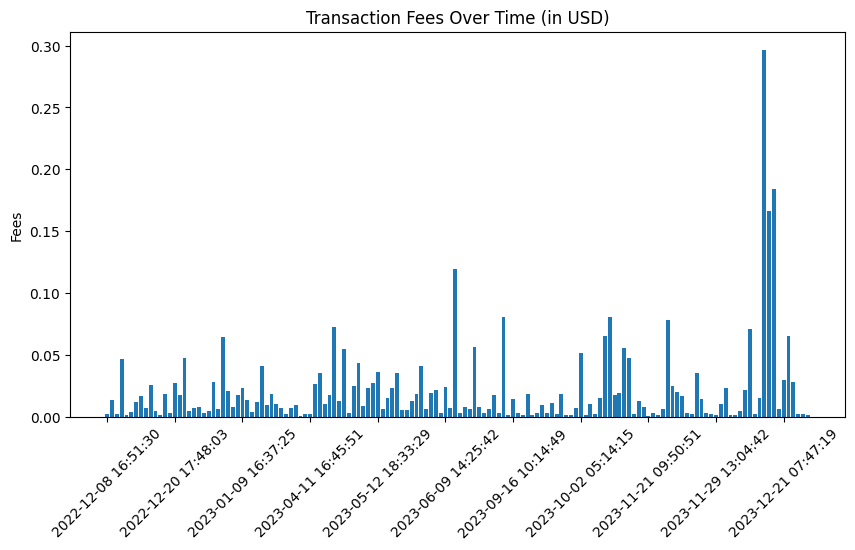

Total fees payed by user (in USD) - 3.159674099453706
Total fees payed by user (in MATIC) - 4.024646132575817


In [203]:
plt.figure(figsize=(10, 5))
plt.bar(df['DateTime (UTC)'], df['TxnFee(USD)'])
plt.ylabel('Fees')
plt.title('Transaction Fees Over Time (in USD)')
plt.xticks(df['DateTime (UTC)'].iloc[::len(df['DateTime (UTC)'])//10], rotation=45)

plt.show()
print('Total fees payed by user (in USD) -', u)
print('Total fees payed by user (in MATIC) -', m)

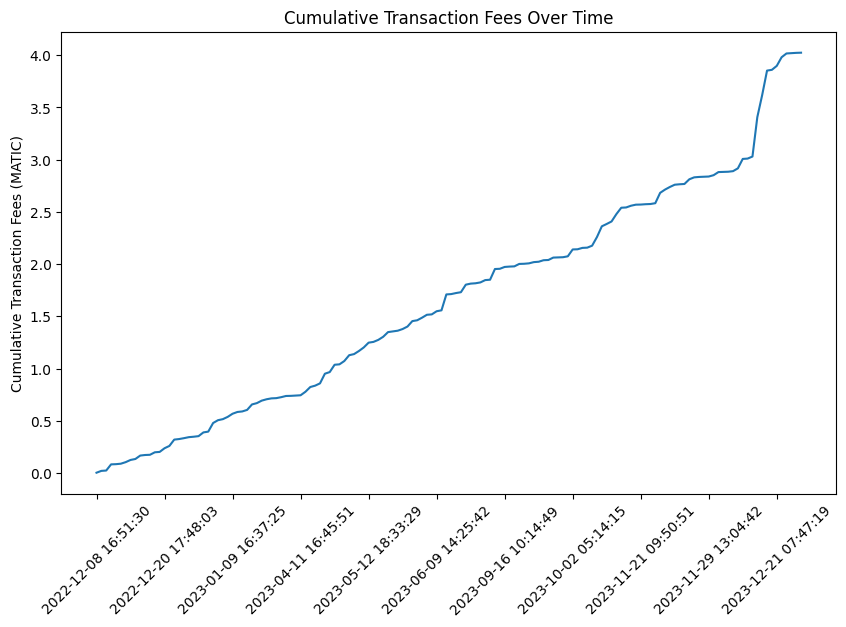

Total fees payed by user (in USD) - 3.159674099453706
Total fees payed by user (in MATIC) - 4.024646132575817


In [204]:
df['Cumulative_TxnFee'] = df['TxnFee(MATIC)'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime (UTC)'], df['Cumulative_TxnFee'])
plt.ylabel('Cumulative Transaction Fees (MATIC)')
plt.title('Cumulative Transaction Fees Over Time')
plt.xticks(df['DateTime (UTC)'].iloc[::len(df['DateTime (UTC)'])//10], rotation=45)

plt.show()
print('Total fees payed by user (in USD) -', u)
print('Total fees payed by user (in MATIC) -', m)

Please Note: this and future diagrams shows volume of only MATIC.
So, if user operates with other currency and then exchange it to MATIC it may looks like user spends more MATIC than he gets.


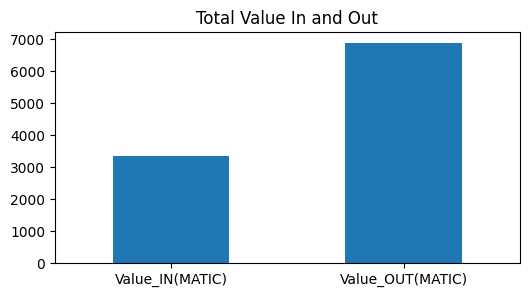

Total user volume in MATIC -  10227.26919173


In [205]:
print('Please Note: this and future diagrams shows volume of only MATIC.')
print('So, if user operates with other currency and then exchange it to MATIC it may looks like user spends more MATIC than he gets.')
volume_sum = sum(df['Value_IN(MATIC)'] + df['Value_OUT(MATIC)'])
total_value_in = df['Value_IN(MATIC)'].sum()
total_value_out = df['Value_OUT(MATIC)'].sum()
average_txn_fee = df['TxnFee(MATIC)'].mean()
plt.figure(figsize=(6, 3))
df[['Value_IN(MATIC)', 'Value_OUT(MATIC)']].sum().plot(kind='bar', rot=0)
plt.title('Total Value In and Out')

plt.show()
print('Total user volume in MATIC - ', volume_sum)

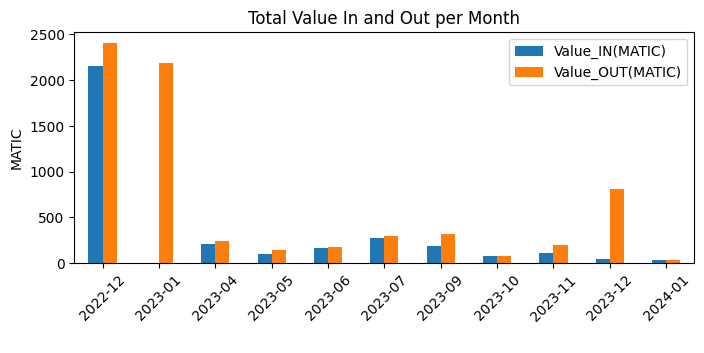

In [206]:
monthly_summary = df.groupby('MonthYear')[['Value_IN(MATIC)', 'Value_OUT(MATIC)']].sum()
monthly_summary.plot(kind='bar', rot=0, ylabel='MATIC', figsize=(8, 3) )
plt.title('Total Value In and Out per Month')
plt.xticks(rotation=45)
plt.xlabel(' ')

plt.show()

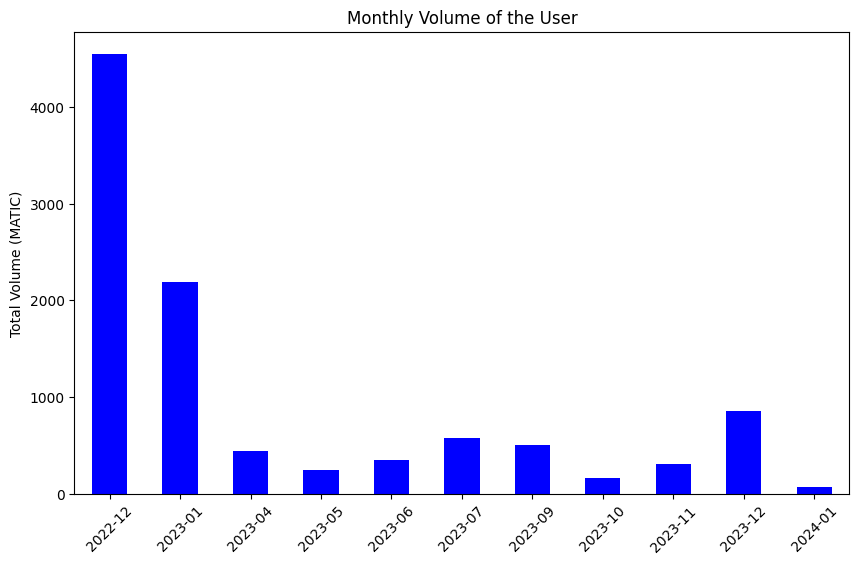

In [208]:
df['Month'] = df['DateTime (UTC)_converted'].dt.to_period('M')
monthly_volume = df.groupby('Month')[['Value_IN(MATIC)', 'Value_OUT(MATIC)']].sum()
monthly_volume['Total_Volume(MATIC)'] = monthly_volume['Value_IN(MATIC)'] + monthly_volume['Value_OUT(MATIC)']
plt.figure(figsize=(10, 6))
monthly_volume['Total_Volume(MATIC)'].plot(kind='bar', color='blue')
plt.title('Monthly Volume of the User')
plt.xlabel('')
plt.ylabel('Total Volume (MATIC)')
plt.xticks(rotation=45)

plt.show()

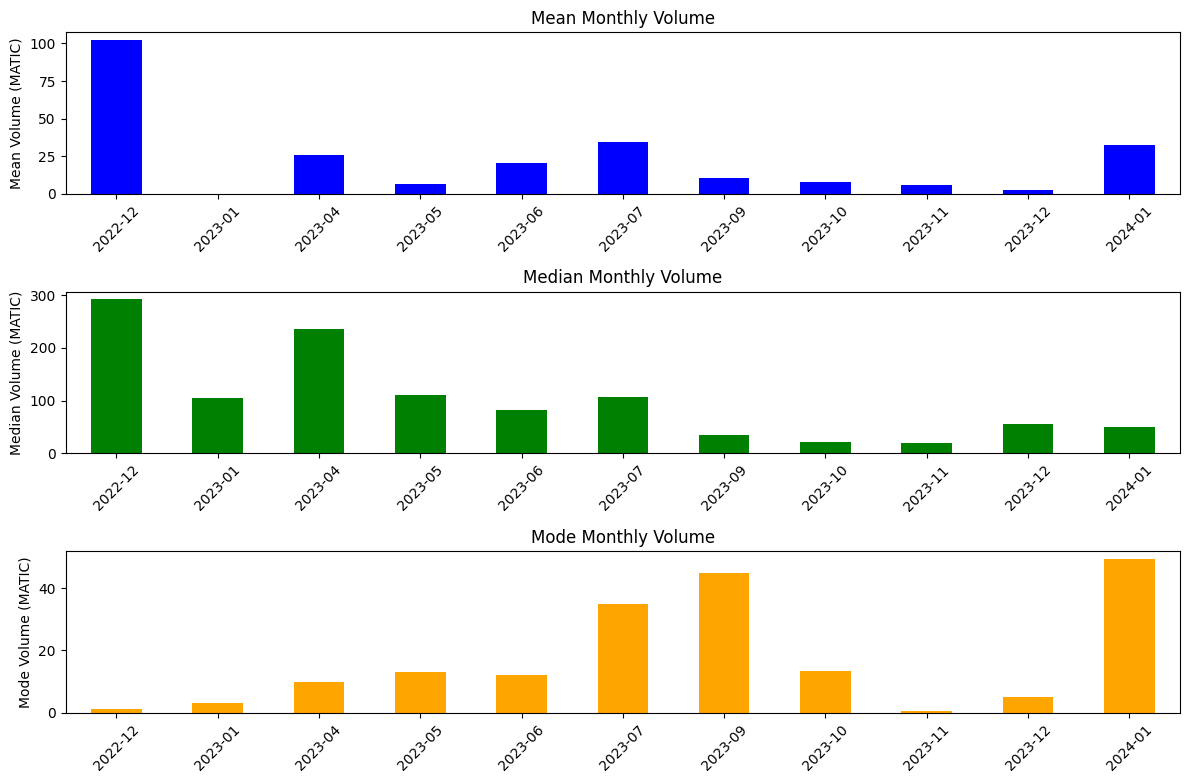

As we can see, its better to use the median for analysis


In [209]:
def positive_mode(x):
    positive_values = x[x > 0]
    if len(positive_values) == 0:
        return np.nan
    return positive_values.mode().iloc[0]
    
monthly_stats = df.groupby('Month')[['Value_IN(MATIC)', 'Value_OUT(MATIC)']].agg(['mean', 'median', lambda x: positive_mode(x)])
monthly_stats.columns = ['Mean_Volume_IN', 'Mean_Volume_OUT', 'Median_Volume_IN', 'Median_Volume_OUT', 'Mode_Volume_IN', 'Mode_Volume_OUT']
monthly_stats['Mean_Volume'] = monthly_stats['Mean_Volume_IN'] + monthly_stats['Mean_Volume_OUT']
monthly_stats['Median_Volume'] = monthly_stats['Median_Volume_IN'] + monthly_stats['Median_Volume_OUT']
monthly_stats['Mode_Volume'] = monthly_stats['Mode_Volume_IN'] + monthly_stats['Mode_Volume_OUT']
plt.figure(figsize=(12, 8))

#For Mean volume
plt.subplot(3, 1, 1)
monthly_stats['Mean_Volume'].plot(kind='bar', color='blue')
plt.title('Mean Monthly Volume')
plt.xlabel('')
plt.ylabel('Mean Volume (MATIC)')
plt.xticks(rotation=45)


#For Median volume
plt.subplot(3, 1, 2)
monthly_stats['Median_Volume'].plot(kind='bar', color='green')
plt.title('Median Monthly Volume')
plt.xlabel('')
plt.ylabel('Median Volume (MATIC)')
plt.xticks(rotation=45)


#For Mode volume
plt.subplot(3, 1, 3)
monthly_stats['Mode_Volume'].plot(kind='bar', color='orange')
plt.title('Mode Monthly Volume')
plt.xlabel('')
plt.ylabel('Mode Volume (MATIC)')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()
print('As we can see, its better to use the median for analysis' ) 

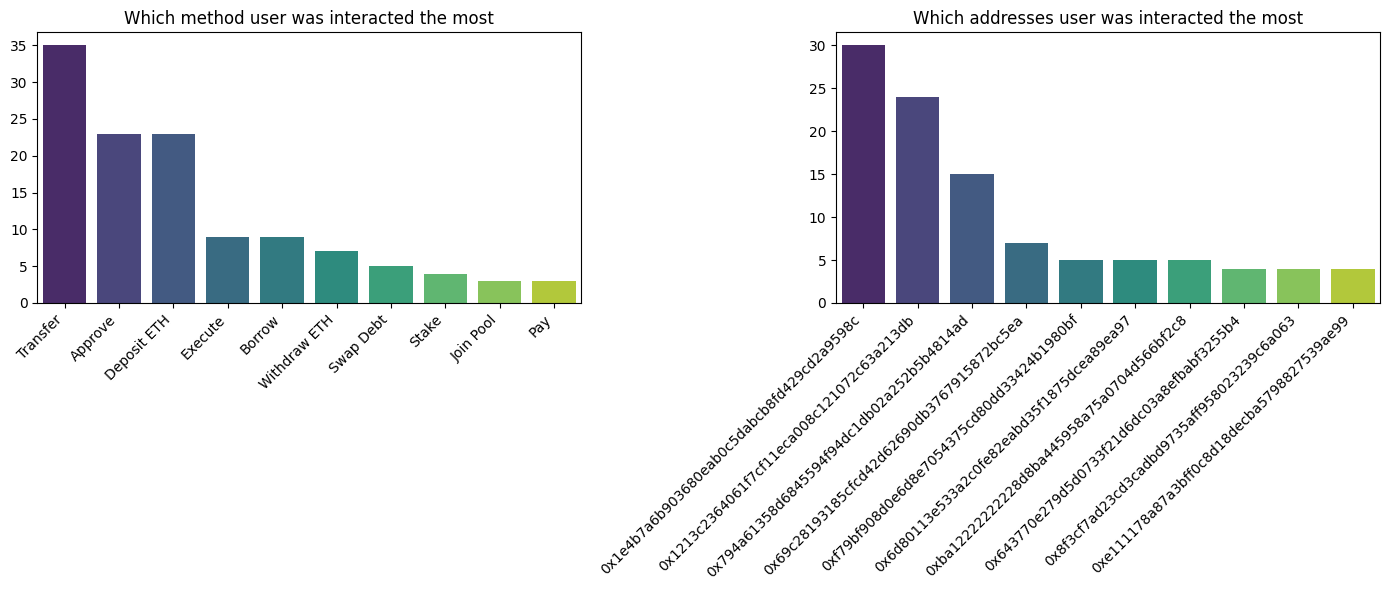

In [210]:
method_counts = df['Method'].value_counts()
top_methods = method_counts[:10]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_methods.index, y=top_methods.values, hue=top_methods.index, palette="viridis", dodge=False)
plt.title("Which method user was interacted the most")
plt.xlabel('')
plt.xticks(rotation=45, ha="right")


address_counts = df['To'].value_counts()
top_values = address_counts[:10]

plt.subplot(1, 2, 2)
sns.barplot(x=top_values.index, y=top_values.values, hue=top_values.index, palette="viridis", dodge=False)
plt.title("Which addresses user was interacted the most")
plt.xlabel('')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()


plt.show()

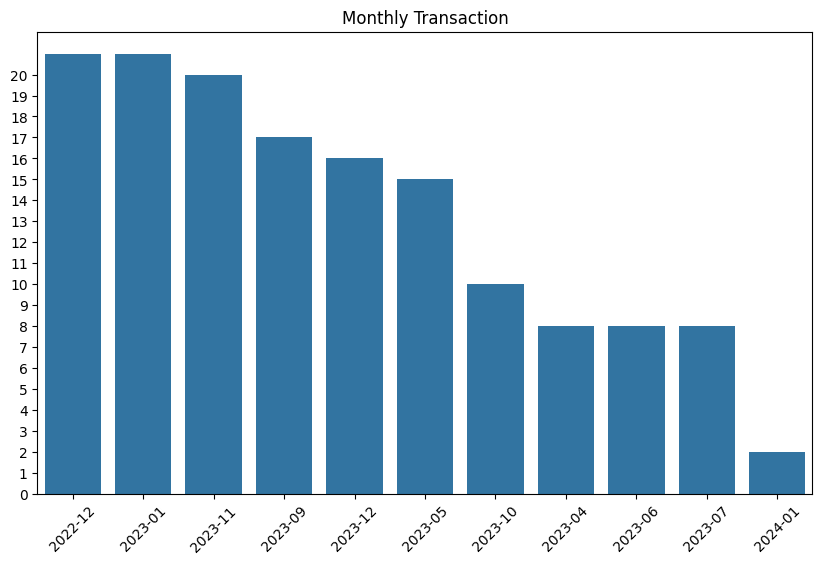

Month
2022-12    21
2023-01    21
2023-11    20
2023-09    17
2023-12    16
2023-05    15
2023-10    10
2023-04     8
2023-06     8
2023-07     8
2024-01     2
Freq: M, Name: Blockno, dtype: int64


In [212]:
# Count the number of transactions per month using 'Blockno'
monthly_transactions = df['Blockno'].groupby(df['Month']).count()

monthly_transactions = monthly_transactions.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_transactions.index, y=monthly_transactions.values)
plt.xlabel('')
plt.title('Monthly Transaction')
plt.xticks(rotation=45)
plt.yticks(range(0, max(monthly_transactions.values)))
plt.show()
print(monthly_transactions)